In [9]:
#NOTE: this scripts generates the DAILY DATA; does NOT update the 'trend data' in the end (estimated execution time: < ~3*no_of_days mins)

from flask import Flask, request
from flask_restful import Resource, Api
import json
import sys
#import pyrebase
from firebase import firebase
import os
import datetime
import numpy as npy
from enum import Enum
import timesynth as ts

#defining global constants, labels to replace 'magic constants'
SENSOR_USER_MAP = {0:0, 1:1};
SENSOR_LIMB_MAP = {0:0, 1:3};
INT_LIMB_MAP = {0:'LeftHand', 1:'RightHand', 2:'LeftLeg', 3:'RightLeg'};
LIMB_INT_MAP = {'LeftHand':0, 'RightHand':1, 'LeftLeg':2, 'RightLeg':3};

DAYS_IN_WEEK = 7;
MINUTES_IN_HOURS = 60;
SAMPLES_IN_HOUR = 10;
HOURS_IN_DAY = 24;
DAILY_SAMPLE_COUNT = MINUTES_IN_HOURS*HOURS_IN_DAY//(MINUTES_IN_HOURS//SAMPLES_IN_HOUR);

#comeup with a 'start date', 'end date', and other customizable parameters
ROUND_FACTOR = 1000;

MAX_PERMITTED_SCORE = 0.85;
MIN_PERMITTED_SCORE = 0.1;

DROP_WEEKENDS = True;
#start_date = datetime.date(2018, 6, 20);
#end_date = datetime.date.today();
start_date = datetime.date(2018, 7, 8);
end_date = datetime.date(2018, 8, 30);

#count number of days for which we need to generate data
day_count = int((end_date-start_date+datetime.timedelta(days=1)).days);
is_weekday = npy.arange(1, day_count+1, 1)%DAYS_IN_WEEK < ((DAYS_IN_WEEK-1)-1);


#specify 'user_id', and 'limb_id' for the users
user_id = [0, 1];
limb_id = [0, 1, 2, 3];

#connect to firebase database
firebase = firebase.FirebaseApplication("https://accutrack-iot.firebaseio.com", None);

for userId in user_id:
    for limbKey in LIMB_INT_MAP:

        #generate reasonably random user data
        random_noise = npy.random.normal(0, 1, [day_count, 4]);
        random_noise[abs(random_noise) >= 1] = 1;
        
        active_hours_range = npy.array([8, 13, 19, 22]) + npy.zeros([day_count, 4]) + random_noise;
        active_hours_range = npy.round(active_hours_range*MINUTES_IN_HOURS/SAMPLES_IN_HOUR).astype(int);

        random_activity_data = npy.random.uniform(MIN_PERMITTED_SCORE, MAX_PERMITTED_SCORE, size=[day_count, DAILY_SAMPLE_COUNT]);
        seasonal_data = random_activity_data;
        seasonal_data = npy.abs(npy.cos(npy.linspace(0, npy.pi, DAILY_SAMPLE_COUNT)+npy.random.normal(0, npy.pi, DAILY_SAMPLE_COUNT)));

        random_activity_data = random_activity_data/6 + seasonal_data/2;
        random_activity_data[random_activity_data > MAX_PERMITTED_SCORE] = MAX_PERMITTED_SCORE;
        random_activity_data[random_activity_data < MIN_PERMITTED_SCORE] = MIN_PERMITTED_SCORE;

        #make sure to delete weekends, and times when the user is not working
        user_work_times = npy.zeros([day_count, DAILY_SAMPLE_COUNT]);
        for day_idx in range(0, day_count):
            if (is_weekday[day_idx]):
                user_work_times[day_idx, active_hours_range[day_idx, 0]:active_hours_range[day_idx, 1] ] = 1;
                user_work_times[day_idx, active_hours_range[day_idx, 2]:active_hours_range[day_idx, 3]] = 1;

        random_activity_data = random_activity_data * (user_work_times*1.0); 


        for day_idx in range(0, day_count):
            
            #update database keys according to date, user_id, limb_id
            curr_date = start_date + datetime.timedelta(days=day_idx);             
            curr_date = curr_date.year*372 + curr_date.month*31 + curr_date.day;
            
            user_key = "/Users/"+str(userId);
            database_key = user_key+"/History/"+limbKey+"/"+str(curr_date)+"/";
            
            #update the 'CurrentVal' Fields
            firebase.delete(user_key+"/CurrentValue/", limbKey);
            firebase.post(user_key+"/CurrentValue/"+limbKey+"/", npy.round(npy.random.uniform()*ROUND_FACTOR)/ROUND_FACTOR);
            
            #push a new request for EACH one of the 240 instances (only when there's atleast some activity)
            active_times = npy.array(npy.where(user_work_times[day_idx, :])).ravel();                   
            for curr_time_chunk in active_times:
                expand_curr_time_chunk = curr_time_chunk*(MINUTES_IN_HOURS//SAMPLES_IN_HOUR);

                firebase.delete(database_key, str(expand_curr_time_chunk));
                firebase.post(database_key+str(expand_curr_time_chunk), random_activity_data[day_idx, curr_time_chunk]);
                
        #create a 'tracker' that allows us to see how long we need to the fake-data generator
        print("USER, LIMB: " + str((userId, limbKey)));


    
#push data to the required range of data

AttributeError: module 'firebase.firebase' has no attribute 'FirebaseApplication'

In [1]:
from flask import Flask, request
from flask_restful import Resource, Api
import json
import sys
import tensorflow as tf
from firebase import firebase
import os
import datetime
import numpy as npy
from enum import Enum
import timesynth as ts

x = datetime.timedelta(days=1);
y = datetime.date.today() + 2*x;
print(y.month);

7


In [2]:
x = npy.where(npy.array([1, 0, 1, 1, 0]))
npy.random.uniform()

0.8630097591473582

In [8]:
from flask import Flask, request
from flask_restful import Resource, Api
import json
import sys
import tensorflow as tf
from firebase import firebase
import os
import datetime
import numpy as npy
from enum import Enum
import timesynth as ts

#defining global constants, labels to replace 'magic constants'
SENSOR_USER_MAP = {0:0, 1:1};
SENSOR_LIMB_MAP = {0:0, 1:3};
INT_LIMB_MAP = {0:'LeftHand', 1:'RightHand', 2:'LeftLeg', 3:'RightLeg'};
LIMB_INT_MAP = {'LeftHand':0, 'RightHand':1, 'LeftLeg':2, 'RightLeg':3};

DAYS_IN_WEEK = 7;
MINUTES_IN_HOURS = 60;
SAMPLES_IN_HOUR = 10;
HOURS_IN_DAY = 24;
DAILY_SAMPLE_COUNT = MINUTES_IN_HOURS*HOURS_IN_DAY//(MINUTES_IN_HOURS//SAMPLES_IN_HOUR);

#comeup with a 'start date', 'end date', and other customizable parameters
ROUND_FACTOR = 1000;

MAX_PERMITTED_SCORE = 0.85;
MIN_PERMITTED_SCORE = 0.1;

DROP_WEEKENDS = True;
MAX_TREND_DAYS = 7;
start_date = datetime.date(2018, 7, 1);
end_date = datetime.date.today();

#count number of days for which we need to generate data
day_count = int((end_date-start_date+datetime.timedelta(days=1)).days);
is_weekday = npy.arange(1, day_count+1, 1)%DAYS_IN_WEEK < ((DAYS_IN_WEEK-1)-1);
is_weekday_mat = npy.fliplr(npy.reshape(is_weekday, [1, len(is_weekday)]));
is_weekday_mat = npy.reshape(npy.fliplr(npy.cumsum(is_weekday_mat, axis=1)), [len(is_weekday),]);

#consider the case where we don't have enough data, extract the hash of the first day
MAX_TREND_DAYS = npy.min([MAX_TREND_DAYS, is_weekday_mat[0]]);

print((npy.fliplr([is_weekday])[0]))
print(npy.cumsum(npy.fliplr([is_weekday])[0]))
print(npy.where(npy.array([1, 3, 4, -1])==4)[0][0])

[ True  True  True  True  True False False  True  True  True  True]
[1 2 3 4 5 5 5 6 7 8 9]
2


In [3]:
import numpy as npy

#configure function s.t. it adds 

In [4]:
from flask import Flask, request
from flask_restful import Resource, Api
import json
import sys
import tensorflow as tf
from firebase import firebase
import os
import datetime
import numpy as npy
from enum import Enum
import timesynth as ts

firebase = firebase.FirebaseApplication("https://accutrack-iot.firebaseio.com", None);
x = firebase.get("Users/0/History/LeftHand", None);
z = list(x.keys());
print(list(x.values()));

[{'324': {'-LH6nhEPcal7sDVtmsyP': 0.5219415098263125}, '330': {'-LH6nhIG8gjatk5Il4cx': 0.11541357462687597}, '336': {'-LH6nhM2farjY_pYYAOB': 0.3101835146402118}, '342': {'-LH6nhPs5haDhE2EFZBt': 0.1}, '348': {'-LH6nhTcuCsbzQy8tIDx': 0.6150952185527376}, '354': {'-LH6nhXLXYS77OxhrpSu': 0.45819405593531565}, '360': {'-LH6nha7_3xg95piLg6Y': 0.6026100906138181}, '366': {'-LH6nhdundtYbyJTroC9': 0.5251401854419684}, '372': {'-LH6nhhi0knF3CEKC_qC': 0.5750570781877821}, '378': {'-LH6nhlSZjPyYIHW_-GQ': 0.28619688035197455}, '384': {'-LH6nhp90YCETQ2YfxTS': 0.519821398819131}, '390': {'-LH6nhsuvccWuwlQpgtk': 0.14176536477301768}, '396': {'-LH6nhwh0qE7tn2kug9q': 0.32113663304518214}, '402': {'-LH6ni-WErMkDTONeYts': 0.3499566463617276}, '408': {'-LH6ni3FMstjme7sybr2': 0.37519510841294373}, '414': {'-LH6ni70Wwoe14u2Wqhm': 0.5166472412585653}, '420': {'-LH6niAmahMdttQCIBDL': 0.5289322144819255}, '426': {'-LH6niEY9M5QCWtLX8Wo': 0.17373797796914722}, '432': {'-LH6niIKJq1x-DAstgB7': 0.49992495916423113},

INFO:requests.packages.urllib3.connectionpool:Starting new HTTPS connection (1): accutrack-iot.firebaseio.com
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Found custom seasonality named "daily", disabling built-in daily seasonality.


0      2018-07-07 21:27:41.387034
1      2018-07-07 21:33:41.387053
2      2018-07-07 21:39:41.387059
3      2018-07-07 21:45:41.387064
4      2018-07-07 21:51:41.387067
5      2018-07-07 21:57:41.387071
6      2018-07-07 22:03:41.387076
7      2018-07-07 22:09:41.387080
8      2018-07-07 22:15:41.387084
9      2018-07-07 22:21:41.387088
10     2018-07-07 22:27:41.387092
11     2018-07-07 22:33:41.387095
12     2018-07-07 22:39:41.387100
13     2018-07-07 22:45:41.387104
14     2018-07-07 22:51:41.387107
15     2018-07-07 22:57:41.387111
16     2018-07-07 23:03:41.387115
17     2018-07-07 23:09:41.387119
18     2018-07-07 23:15:41.387140
19     2018-07-07 23:21:41.387143
20     2018-07-07 23:27:41.387146
21     2018-07-07 23:33:41.387150
22     2018-07-07 23:39:41.387153
23     2018-07-07 23:45:41.387157
24     2018-07-07 23:51:41.387161
25     2018-07-07 23:57:41.387164
26     2018-07-08 00:03:41.387168
27     2018-07-08 00:09:41.387171
28     2018-07-08 00:15:41.387175
29     2018-07

/home/accutrackiot/accutrackproject/accutrackenv3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


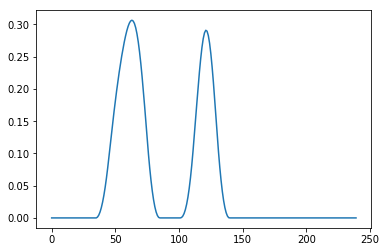

In [23]:
#NOTE: calculate, update trend data (estimated execution time = < 7 mins)

from flask import Flask, request
from flask_restful import Resource, Api
import json
import sys
import tensorflow as tf
from firebase import firebase
import os
import datetime
import numpy as npy
from enum import Enum
import timesynth as ts
import pandas as pd
from matplotlib import pyplot as plt
from fbprophet import Prophet

firebase = firebase.FirebaseApplication("https://accutrack-iot.firebaseio.com", None);

#operating_day = datetime.date.today();
operating_day = datetime.date(2018, 8, 30);

for user_idx in ('0', '1'):
    for limb_idx in ('LeftHand', 'RightHand', 'LeftLeg', 'RightLeg'):

        #repeat the process for all users and limbs
        daylist_key = "Users/" + user_idx + "/History/"+limb_idx+"/";
        history_data = firebase.get(daylist_key, None);

        #extract, re-format database information before processing
        MAX_TREND_DAYS = 7;
        daylist_days = list(history_data.keys());
        trend_day_count = npy.min(npy.array([MAX_TREND_DAYS, len(daylist_days)]));
        daylist_days = daylist_days[(-trend_day_count):];

        history_data = [history_data[key] for key in daylist_days];
        history_data = [ (list(value.keys()), list(value.values())) for value in history_data ];

        history_data_keys = [npy.array([int(val) for val in value[0]]).astype(int) for value in history_data]
        history_data_values = [npy.array([ list(element.values())[0] for element in value[1] ]) for value in history_data];

        day_time_list = npy.arange(0, 24*60, 6);
        day_data_list = npy.zeros([len(history_data_keys), 24*10]);
        for key in range(0, len(history_data_keys)):
            day_data_list[key, history_data_keys[key]//6] = history_data_values[key];

        #linearly concatenate all the points         
        day_data_list = (npy.reshape(day_data_list, npy.prod(day_data_list.shape)));
        day_data_list = npy.log(day_data_list*(npy.exp(1)-1)+1);    
        dataFrame = pd.DataFrame(day_data_list);     
        dataFrame['ds'] = [datetime.datetime.today()-datetime.timedelta(days=(MAX_TREND_DAYS-1))+datetime.timedelta(minutes=6*k) for k in range(0, len(day_data_list))];
        print(dataFrame['ds'])
        dataFrame.columns = ['y', 'ds'];
        dataFrame = dataFrame.reindex(columns=['ds', 'y']);
        dataFrame['cap'] = 1.0;
        dataFrame['floor'] = 0.0;

        #predict hourly trends in the data, extract prediction
        fb_model = Prophet();
        fb_model.add_seasonality(name="hourly", period=1, fourier_order=10); 
        fb_model.add_seasonality(name="daily", period=1/24, fourier_order=10); 

        fb_model = fb_model.fit(dataFrame);
        fb_future = fb_model.make_future_dataframe(periods=240);
        fb_future = fb_model.predict(fb_future);

        final_data = npy.array(fb_future['hourly'])[0:240];
        final_data = (npy.exp(final_data)-1)/(npy.exp(1)-1);

        N = 10;
        final_data_2 = final_data;
        final_data_2[final_data_2 < 0] = 0;
        final_data_2 =npy.convolve(final_data_2, npy.ones((N,))/N, mode='valid')

        #pad the final array to make it 240 elements long
        final_data_3 = npy.zeros(240);
        final_data_3[0:(240-(N-1))] = final_data_2;
        
        #delete old data, put new stuff in the database
        user_key = user_key = "/Users/"+user_idx;
        trend_key_format = user_key + "/TrendLine/" + limb_idx; 
        trend_date_key = trend_key_format + "/" + "LastUpdateDate";
        trend_data_key = trend_key_format + "/" + "TrendData";

        firebase.delete(trend_key_format, "LastUpdateDate");
        firebase.delete(trend_key_format, "TrendData");

        date_hash_calc = operating_day;
        date_hash_calc = int(date_hash_calc.year)*372 + int(date_hash_calc.month)*31 + int(date_hash_calc.day); 

        firebase.post(trend_date_key+"/", str(date_hash_calc));

        yester_string = (str(yester_value) for yester_value in final_data_3);
        yester_string = "["+(','.join(yester_string))+"]";
        firebase.post(trend_data_key+"/", yester_string);
        
        plt.plot(final_data_3);
        plt.show();



INFO:requests.packages.urllib3.connectionpool:Starting new HTTPS connection (1): accutrack-iot.firebaseio.com


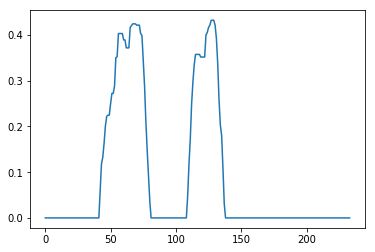

In [75]:
#NOTE: calculate, update trend data (estimated execution time = < 7 mins)

from flask import Flask, request
from flask_restful import Resource, Api
import json
import sys
import tensorflow as tf
from firebase import firebase
import os
import datetime
import numpy as npy
from enum import Enum
import timesynth as ts
import pandas as pd
from matplotlib import pyplot as plt
#from fbprophet import Prophet
from scipy import signal as spysig

firebase = firebase.FirebaseApplication("https://accutrack-iot.firebaseio.com", None);

#for user_idx in ('0', '1'):
#    for limb_idx in ('LeftHand', 'RightHand', 'LeftLeg', 'RightLeg'):
for user_idx in ['0']:
    for limb_idx in ['LeftHand']:
        
        #repeat the process for all users and limbs
        daylist_key = "Users/" + user_idx + "/History/"+limb_idx+"/";
        history_data = firebase.get(daylist_key, None);

        #extract, re-format database information before processing
        MAX_TREND_DAYS = 7;
        daylist_days = list(history_data.keys());
        trend_day_count = npy.min(npy.array([MAX_TREND_DAYS, len(daylist_days)]));
        daylist_days = daylist_days[(-trend_day_count):];

        history_data = [history_data[key] for key in daylist_days];
        history_data = [ (list(value.keys()), list(value.values())) for value in history_data ];

        history_data_keys = [npy.array([int(val) for val in value[0]]).astype(int) for value in history_data]
        history_data_values = [npy.array([ list(element.values())[0] for element in value[1] ]) for value in history_data];

        day_time_list = npy.arange(0, 24*60, 6);
        day_data_list = npy.zeros([len(history_data_keys), 24*10]);
        for key in range(0, len(history_data_keys)):
            day_data_list[key, history_data_keys[key]//6] = history_data_values[key];

        #linearly concatenate all the points         
        '''
        day_data_list = (npy.reshape(day_data_list, npy.prod(day_data_list.shape)));
        day_data_list = npy.log(day_data_list*(npy.exp(1)-1)+1);    
        dataFrame = pd.DataFrame(day_data_list);     
        dataFrame['ds'] = [datetime.datetime.today()-datetime.timedelta(days=(MAX_TREND_DAYS-1))+datetime.timedelta(minutes=6*k) for k in range(0, len(day_data_list))];
        print(dataFrame['ds'])
        dataFrame.columns = ['y', 'ds'];
        dataFrame = dataFrame.reindex(columns=['ds', 'y']);
        dataFrame['cap'] = 1.0;
        dataFrame['floor'] = 0.0;

        #predict hourly trends in the data, extract prediction
        fb_model = Prophet();
        fb_model.add_seasonality(name="hourly", period=1, fourier_order=10); 
        fb_model.add_seasonality(name="daily", period=1/24, fourier_order=10); 

        fb_model = fb_model.fit(dataFrame);
        fb_future = fb_model.make_future_dataframe(periods=240);
        fb_future = fb_model.predict(fb_future);

        final_data = npy.array(fb_future['hourly'])[0:240];
        final_data = (npy.exp(final_data)-1)/(npy.exp(1)-1);

        N = 10;
        final_data_2 = final_data;
        final_data_2[final_data_2 < 0] = 0;
        final_data_2 =npy.convolve(final_data_2, npy.ones((N,))/N, mode='valid')

        #pad the final array to make it 240 elements long
        #final_data_3 = npy.zeros(240);
        #final_data_3[0:(240-(N-1))] = final_data_2;
        '''
        
        N = 7;
        final_data_3 = npy.median(day_data_list, axis=0);
        final_data_3 = npy.convolve(final_data_3, npy.ones((N,))/N, mode='valid');
        final_data_3 = spysig.medfilt(final_data_3, kernel_size=N);
        
        #delete old data, put new stuff in the database
        user_key = user_key = "/Users/"+user_idx;
        trend_key_format = user_key + "/TrendLine/" + limb_idx; 
        trend_date_key = trend_key_format + "/" + "LastUpdateDate";
        trend_data_key = trend_key_format + "/" + "TrendData";

        #firebase.delete(trend_key_format, "LastUpdateDate");
        #firebase.delete(trend_key_format, "TrendData");

        date_hash_calc = datetime.date.today();
        date_hash_calc = int(date_hash_calc.year)*372 + int(date_hash_calc.month)*31 + int(date_hash_calc.day); 

        #firebase.post(trend_date_key+"/", str(date_hash_calc));

        yester_string = (str(yester_value) for yester_value in final_data_3);
        yester_string = "["+(','.join(yester_string))+"]";
        #firebase.post(trend_data_key+"/", yester_string);
        
        plt.plot(final_data_3);
        plt.show();



In [5]:
fb_future.head();

N = 10;
final_data_2 = final_data;
final_data_2[final_data_2 < 0] = 0;
final_data_2 =npy.convolve(final_data_2, npy.ones((N,))/N, mode='valid')


plt.plot(final_data_3, 'r.');
 
    
    
#plt.plot(final_data)
plt.show()



NameError: name 'fb_future' is not defined

240


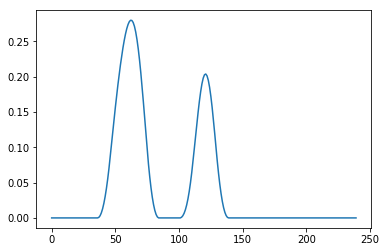

In [167]:
x = npy.matrix("[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0006989537413201093,0.0030379907929372913,0.007114164261191361,0.01299838970379807,0.020734293044415673,0.030338341049309582,0.04180126457223329,0.05509064607648523,0.07015440200962242,0.08692477107083221,0.10462338840785858,0.12222164393677105,0.13952962008368414,0.15637959181362684,0.17262715898811423,0.18814959282472385,0.20284152028636138,0.21660838438788896,0.22935841769065313,0.24099411453883796,0.2514043495776519,0.26045833606838364,0.2680025269719058,0.27386132692472054,0.2778421143527886,0.2797445986893835,0.27937400782541916,0.27655708061994005,0.27115940287908374,0.2631023415453604,0.25237775298552795,0.23905878819492174,0.2233054772913377,0.2053643020560562,0.18556158796282,0.1642911856753333,0.14199748510907723,0.11915524349133498,0.09673913199628986,0.07639012742061861,0.058306909863290596,0.04263459558263548,0.029459565967530205,0.01880774407744754,0.010646200227510606,0.004887636336898904,0.0013970767825581666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0009685478512431508,0.0030939228968411905,0.006563319655510956,0.011561048764955516,0.018257828566854404,0.026798874115823875,0.03729121333034777,0.04979091713475481,0.06429121404529778,0.08071270967446573,0.09792852178198166,0.1155115483204036,0.1329595081283382,0.14970718247316128,0.16515347328329938,0.17869443165336346,0.1897599543891934,0.19785111848074002,0.202574745309506,0.20367184295392912,0.2010370712842449,0.19472724265918318,0.18495799281257264,0.17208898753060164,0.15659921678175145,0.13905491945489895,0.1200733461019488,0.10028581079055111,0.08106188705124213,0.06354329377765108,0.047993705488576226,0.034595132529617954,0.02344702580962411,0.014570627637327506,0.00791732777414068,0.0033796211819596147,0.0008033325845559523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]");
x = npy.array(x);

print(len(x[0]))
plt.plot(x[0, :]);
plt.show()


In [ ]:
#NOTE: this scripts generates the DAILY DATA; does NOT update the 'trend data' in the end (estimated execution time: < ~3*no_of_days mins)

from flask import Flask, request
from flask_restful import Resource, Api
import json
import sys
#import pyrebase
import firebase.firebase.firebase as firebase_real
import os
import datetime
import numpy as npy
from enum import Enum
import timesynth as ts
import numpy as np
import time

for _ in range(1000):

    #connect to firebase database
    firebase_obj = firebase_real.FirebaseApplication("https://accutrack-iot.firebaseio.com", None);
    output_series_b = 250 * np.random.random([10])
    output_series_a = 150 * np.random.random([10])
    
    firebase_obj.put(os.path.join('Users', '0', 'CurrentValue', 'SensorValues'), 'bSensor', str(list(output_series_b))[1:-1]);
    firebase_obj.put(os.path.join('Users', '0', 'CurrentValue', 'SensorValues'), 'aSensor', str(list(output_series_a))[1:-1]);
    
    time.sleep(1)

In [23]:
output_series = np.random.random([10])
print(output_series)

[0.73413712 0.70723006 0.23021859 0.73365007 0.51291724 0.7442532
 0.24853727 0.36189941 0.91656857 0.76173802]
